In [122]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline

In [134]:
main_directory = "/data0/jamesarnemann/cosmoNet/orig_paper/"
main_directory_2 = "/data1/jamesarnemann/cosmoNet/new_data_2/"
model_directories = {}

model_directories["original data"] = main_directory + "temp_results_0_vanilla_code/"
model_directories["original data rerun"] = main_directory + "result/"

model_directories["new data"] = main_directory_2 + "result/"

#model_directories["new model 1(run 1)"] = main_directory + "first_change_result"
#model_directories["new model 1(run 2)"] = main_directory + "first_change_result2"
#model_directories["new model 2"] = main_directory + "second_change_result"

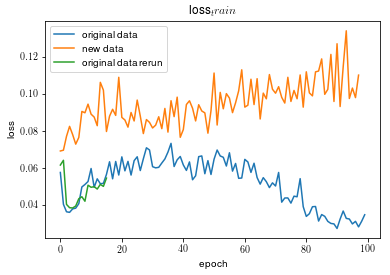

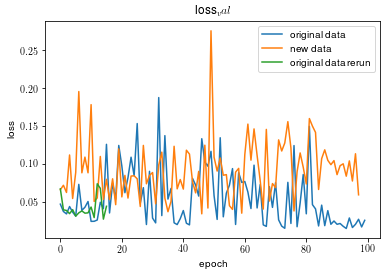

In [167]:
loss_types = ['loss_train','loss_val']
for loss_type in loss_types:
    file_type = '/' + loss_type + '.txt'
    plot ={}
    for model,model_dir in model_directories.iteritems():
        loss_file = open(model_dir + file_type, "r")

        loss = [float(val) for val in loss_file.read().splitlines()]

        plot[model], = plt.plot(loss, label=model)
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.title(loss_type)

#    plt.xlim((0,100))
    plt.ylim()
    plt.legend(handles=[plot[model] for model in model_directories])
    plt.show()

In [47]:
loss_type = 'loss_test'
file_type = '/' + loss_type + '.txt'
loss = {}
for model,model_dir in model_directories.iteritems():
    loss_file = open(model_dir + file_type, "r")

    loss[model] = np.array([float(val) for val in loss_file.read().splitlines()])

for model in model_directories:
    print model + " test-loss(mean,std):", loss[model].mean(),loss[model].std()

# print "paper test loss:", o_loss.mean(), o_loss.std()
# print "new test loss:", n_loss.mean(), n_loss.std()
# print "difference:", n_loss.mean()-o_loss.mean()
# print "difference std:", (n_loss-o_loss).std()

original data test-loss(mean,std): 0.0120155415878 0.00652328213969
new data test-loss(mean,std): 0.037249439472 0.0144612934567


In [48]:
[2.905168635566176411e-02,4.023372385668218254e-02]

[0.029051686355661764, 0.04023372385668218]

In [79]:
test_results = {}
for model,model_dir in model_directories.iteritems():
    for i in range(49):
        file_name = 'test_batch_' + str(i) +'.txt'
        test_loss_file = open(model_dir + file_name, "r")
        print model
        print model_dir
        print file_name
        if not test_results.has_key(model):
            test_results[model] = []
        test_results[model].append(np.array([x.split() for x in test_loss_file.read().splitlines()],dtype=np.float32))
    test_results[model] = np.array(test_results[model])

original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_0.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_1.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_2.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_3.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_4.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_5.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_6.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_7.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_batch_8.txt
original data
/data0/jamesarnemann/cosmoNet/orig_paper/temp_results_0_vanilla_code/
test_ba

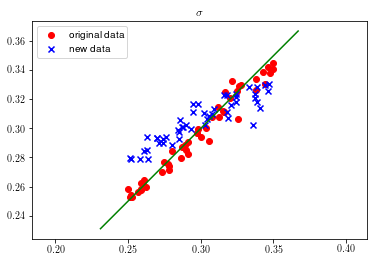

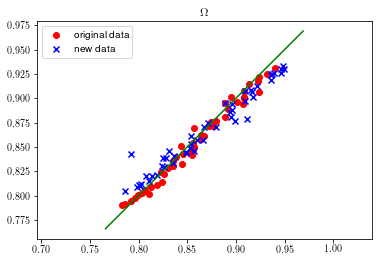

In [129]:
np.mean(test_results['new data'],axis=1).shape
param = 0
labels = [r'\sigma',r'\Omega']
markers = ['o','x']
colors = ['red','blue']

for param in range(0,2):
    for index , model in enumerate(model_directories):
        x = []
        y = []
        averages = np.mean(test_results[model],axis=1)
        for i in range(averages.shape[0]):
            x.append(averages[i][param])
            y.append(averages[i][param+2])
        plt.scatter(x,y,marker=markers[index],c = colors[index],label = model)
        #plt.plot([.2,.4],[.2,.4])
        extremes = [np.min(averages[:,[param,param+2]])-.02,np.max(averages[:,[param,param+2]])+.02]
    plt.plot(extremes,extremes,c='green')
    plt.legend()
    plt.title(labels[param])
    plt.axis('equal')
    plt.show()

In [166]:
for model in model_directories:

    if test_results.has_key(model):
        print "------------"
        print model
        print r'actual sigma Omega predicted sigma Omega average'
        for i in range(4):
            print np.mean(np.mean(test_results[model][:,:,i],axis=1)),
        print ""
        print "predicted sigma Omega difference from actual"
        for i in range(2):
            print np.std(np.mean(test_results[model][:,:,i+2],axis=1)-np.mean(test_results[model][:,:,i],axis=1)),
        print ""

------------
original data
actual sigma Omega predicted sigma Omega average
0.298494 0.859538 0.296268 0.85641 
predicted sigma Omega difference from actual
0.00572131 0.00597275 
------------
new data
actual sigma Omega predicted sigma Omega average
0.300163 0.869429 0.305814 0.867171 
predicted sigma Omega difference from actual
0.0154979 0.0135171 
